In [5]:
import os
import sys
src_path = sys.path[0].replace("paper_working", "src")
# data_path = sys.path[0].replace("notebooks", "data")
if src_path not in sys.path:
    sys.path.append(src_path)

out_path = sys.path[0].replace("paper_working", "output")

import warnings
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl
import pandas as pd
import sys
import calendar
import os
from matplotlib.lines import Line2D
import matplotlib.dates as mdates


from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import ConnectionPatch

rc_={
    "figure.dpi":600,
    "font.size":10,
    "axes.facecolor":"white",
    "savefig.facecolor":"white",
    "text.usetex":False,
    "legend.frameon":False
}
plt.rcParams.update(rc_)

legend_fs=10
label_fs=12
ticklabel_fs=9
from plot_helper import *

from utils.plot_utils import *
customize_plt() # customize plt configs, see plot_utils

<class 'pandas.core.frame.DataFrame'>


l:\Coding_project\Energy_grid_new\paper_working\plot_helper.py:95: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0,fontsize=ticklabel_fs)
l:\Coding_project\Energy_grid_new\paper_working\plot_helper.py:108: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0,fontsize=ticklabel_fs)


   strategy            pred_model  month_of_year        OPEX   
0       MPC                    GT              1  351.741506  \
1       MSC                    GT              1  439.063607   
2       MPC             Heuristic              1  421.664709   
3       MPC  Heuristic-our-method              1  363.304259   
4       MPC                    GT              2  349.736465   
5       MSC                    GT              2  429.277864   
6       MPC             Heuristic              2  415.154216   
7       MPC  Heuristic-our-method              2  360.721462   
8       MPC                    GT              3  289.074203   
9       MSC                    GT              3  359.622529   
10      MPC             Heuristic              3  367.400977   
11      MPC  Heuristic-our-method              3  301.845384   
12      MPC                    GT              4  295.472004   
13      MSC                    GT              4  386.173351   
14      MPC             Heuristic       

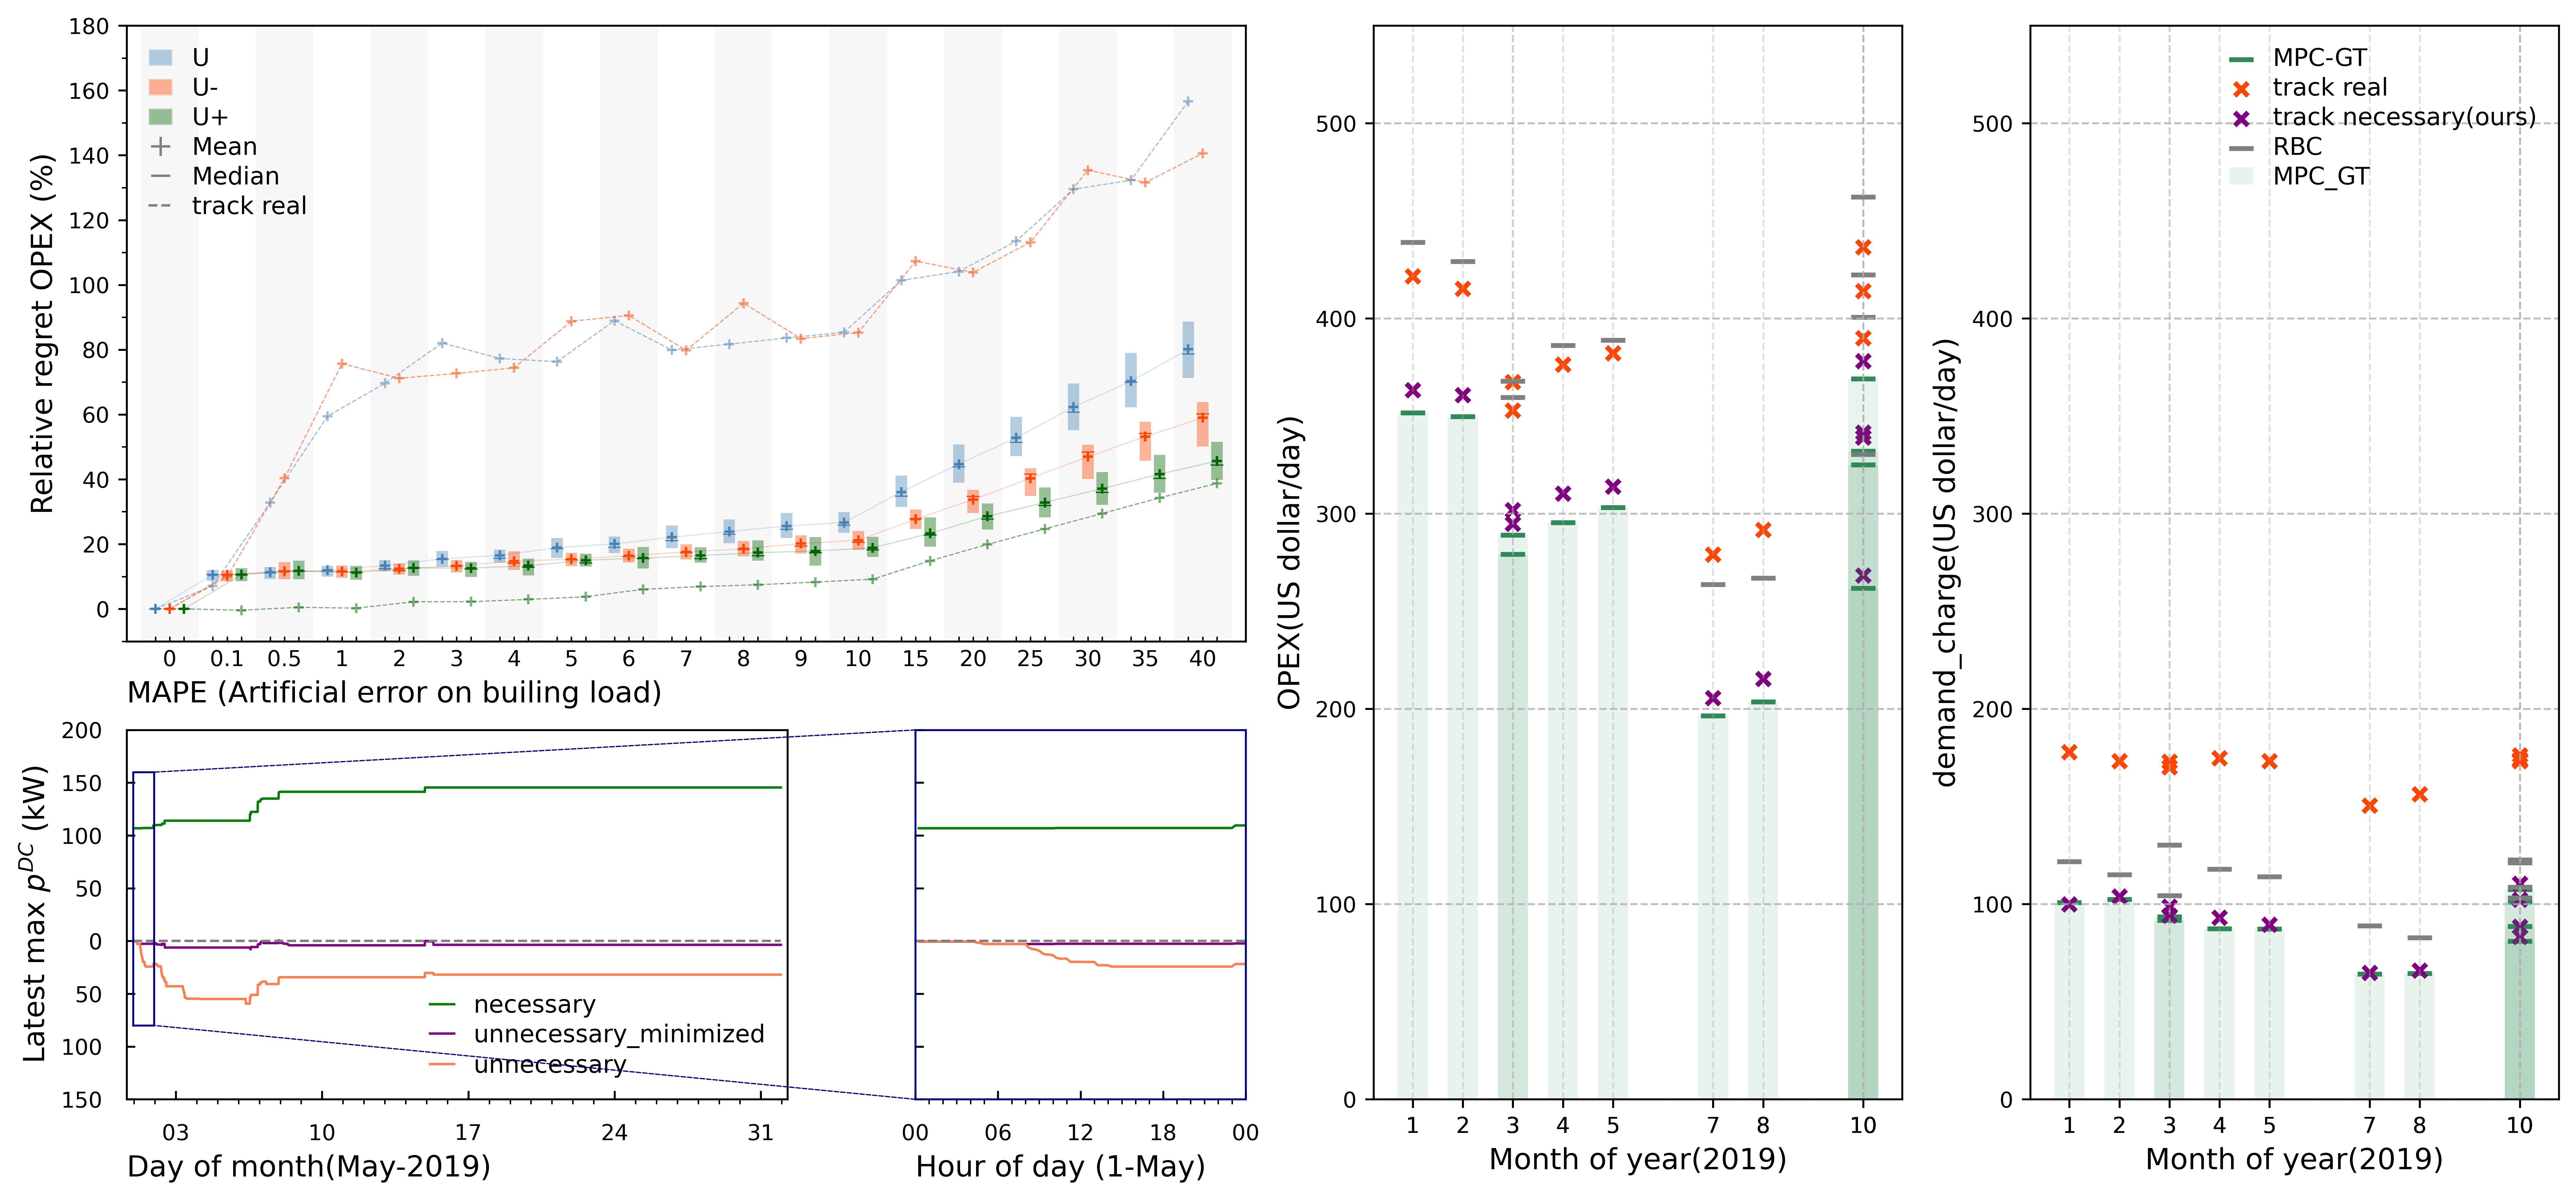

In [6]:
import matplotlib.gridspec as gridspec  # 用网格来创建子图
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18, 8))  # 创建画布
grid = gridspec.GridSpec(2, 4,width_ratios=[1,0.5,0.8  ,0.8],height_ratios=[1,0.6])  # 设定2行*3列的网格
grid.update(wspace = 0.25, hspace = 0.18)

ax1 = fig.add_subplot(grid[0, 0:2])  # 第一行的全部列都添加到ax1中
ax2 = fig.add_subplot(grid[0:2, 2])  # 第二行，第1列
ax3 = fig.add_subplot(grid[0:2, 3])  # 第二行，第3列
ax4 = fig.add_subplot(grid[1, 0:1])  # 第二行，第3列
ax5 = fig.add_subplot(grid[1, 1:2])  # 第二行，第3列

#########################################################################################

i=5
month=i
keys=['necessary','unnecessary_minimized','unnecessary']
postfix=''

merged_df_Jan=get_merged_df(
    file_folder=r'L:\Coding_project\Energy_grid_new_exp_local\thesis_track_p_grid\6h-bat-Oct-track-p-grid',
    log_fn=r'L:\Coding_project\Energy_grid_new\output\experiments\thesis_track_p_grid\6h-bat-Oct-track-p-grid.xlsx',
    id_exe_unne=1+4*(month-1), id_sol_nece=3+4*(month-1), id_mini=4+4*(month-1)
)
plot_track_p_max(df_merged=merged_df_Jan,figsize=(6,5),
                line_keys=keys,plot_error_bar=False,
                ylimit_main=[-150,200],ylimit_sub=[-80,160],
                fontsize=14,ax=ax4,axins=ax5,
                inside_start_day=0,inside_days=1,
                save_fn="fig-2-track_p_grid_max_"+str(i)+postfix+".png")

##########################################################################################

mon_list=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Dec','Nov']
#folder_path=r'D:\Codes\Energy_grid_new\output\experiments\thesis_value_of_information'
folder_path=r'L:\Coding_project\Energy_grid_new\output\experiments\thesis_value_of_information'
fn_list=[]
for i in mon_list:
    fn="6h-bat-"+i+"-disturbance-type.xlsx"
    fn_list.append(os.path.join(folder_path,fn))

mape,y_dic_old,mean_dic_old= get_df_for_plot("by_execution",fn_list)
mape,y_dic,mean_dic= get_df_for_plot("minimize_cap",fn_list) 
    
cluster_box_plot(
        ax=ax1,
        figsize=(8,4),
        mape=mape,y_dic=y_dic,mean_dic=mean_dic,
        mean_dic_old=mean_dic_old,plot_line_old=True
)
    
############################################################################################  
path=r"L:\Coding_project\Energy_grid_new\output\experiments\thesis_value_of_information\6h-bat-12months-compare.xlsx"
df_dc=pd.read_excel(path)
df_opex_dc=pre_process(df_dc,'OPEX','month_of_year')
df_p_grid_dc=pre_process(df_dc,'demand_charge','month_of_year')

plot_params={
    "subplots":{
        "0":{
            "df":df_opex_dc,           
            "key":"OPEX",
            "duration_key":"month_of_year",
            "subtitle":"",
            "limit":[0,550],
            "show_shadow":False,
            "gradient":False,
            "gradient_params":{
                "cmap_name":"coolwarm",
                "cmap_range":[0,0.7],
                "alpha":1
                },
            "plot_arrow":True,
            "arrow_start":'MPC-Heuristic',
            "arrow_end":'MPC-Heuristic-our-method',
            },
        "1":{
            "df":df_p_grid_dc,           
            "key":"demand_charge",
            "duration_key":"month_of_year",
            "subtitle":"",
            "limit":[0,550],
            "show_shadow":False,
            "gradient":False,
            },
            "plot_arrow":True,
            "arrow_start":'MPC-Heuristic',
            "arrow_end":'MPC-Heuristic-our-method',
    },
    "group_plot":[ax2,ax3],
    "labels_not_show":[],
    "relative":False,
    "fontsize":10,
    "n_subplots":2,
    "figsize":(10,8),
    "show_notes":False,
    "marker_s":100,
    "sharey":False,
    "show_line":False,
    "bbox_to_anchor":(1,1),
    "save_fn":None,
    "suptitle":None
}

r_opex_month_6dc=mplot_origin_valid_bar(plot_params)
